<a href="https://colab.research.google.com/github/shubham-bari/StockPrediction/blob/main/Stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(r'ML FIles/HistoricalQuotes.csv')

In [ ]:
df

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


In [ ]:
df = df.iloc[:,3:4]

In [ ]:
df[' Open']=df[' Open'].str.replace('[\$,]', '', regex=True).astype(float)


In [ ]:
df=df[' Open']

In [ ]:
df.shape

(2518,)

In [ ]:
open2=[]
j=2517
for i in range(0,2518):
  open2.append(df[j])
  j=j-1
len(open2)

2518

In [ ]:
df['Open2']=open2
df['Open2']

[np.float64(29.3928),
 np.float64(29.99),
 np.float64(29.8486),
 np.float64(29.8971),
 np.float64(30.7057),
 np.float64(31.43),
 np.float64(31.1871),
 np.float64(31.9757),
 np.float64(31.9871),
 np.float64(32.4814),
 np.float64(32.1971),
 np.float64(32.0257),
 np.float64(32.1286),
 np.float64(32.0143),
 np.float64(32.1128),
 np.float64(31.4957),
 np.float64(32.2343),
 np.float64(32.52),
 np.float64(32.9886),
 np.float64(32.7071),
 np.float64(33.2857),
 np.float64(33.8004),
 np.float64(33.6414),
 np.float64(33.9271),
 np.float64(33.5678),
 np.float64(34.0286),
 np.float64(34.2457),
 np.float64(34.3486),
 np.float64(34.49),
 np.float64(34.6),
 np.float64(34.5514),
 np.float64(35.04),
 np.float64(35.1114),
 np.float64(35.51),
 np.float64(35.29),
 np.float64(35.5057),
 np.float64(36.9721),
 np.float64(36.8914),
 np.float64(38.2843),
 np.float64(38.84),
 np.float64(38.1814),
 np.float64(37.6071),
 np.float64(37.5743),
 np.float64(38.4728),
 np.float64(37.6914),
 np.float64(37.5557),
 np.flo

In [ ]:
df.drop(columns=' Open',inplace=True)

In [ ]:


dic={'Open':open2}
dfnew=pd.DataFrame(dic)
dfnew.tail()
df=dfnew

In [ ]:
df.head()

,Open
0,29.3928
1,29.9900
2,29.8486
3,29.8971
4,30.7057


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_scaled=scaler.fit_transform(df)

In [ ]:
x_train=[]
y_train=[]
for i in range(60,len(df_scaled)):
  x_train.append(df_scaled[i-60:i,0])
  y_train.append(df_scaled[i,0])

np.array(x_train)
np.array(y_train)

array([0.01625206, 0.02144222, 0.02169379, ..., 0.87062684, 0.8522417 ,
       0.77152314])

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

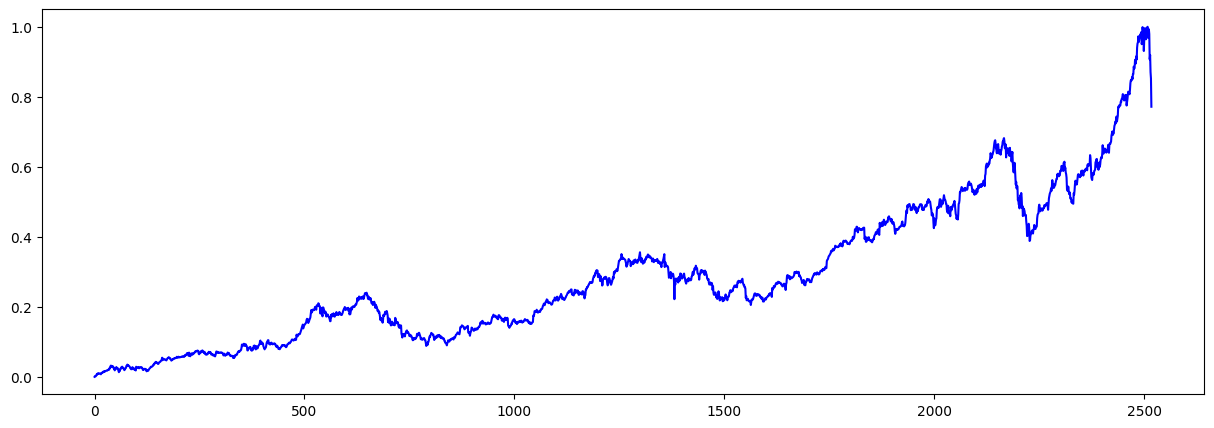

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_scaled, color='blue')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, ReLU, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:

model = Sequential()
model.add(LSTM(units=128, return_sequences=True, activation='relu' ,input_shape=(60,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
len(y_train)

2458

In [ ]:
x_train[:6]

array([[0.        , 0.00202203, 0.00154327, 0.00170748, 0.00444528,
        0.00689764, 0.00607522, 0.0087453 , 0.0087839 , 0.01045752,
        0.00949493, 0.00891459, 0.009263  , 0.00887599, 0.0092095 ,
        0.00712009, 0.00962088, 0.01058822, 0.01217482, 0.01122171,
        0.01318076, 0.01492345, 0.0143851 , 0.01535244, 0.01413591,
        0.0156961 , 0.01643117, 0.01677957, 0.01725833, 0.01763077,
        0.01746622, 0.01912055, 0.0193623 , 0.02071189, 0.01996701,
        0.02069734, 0.02566234, 0.0253891 , 0.03010525, 0.03198676,
        0.02975684, 0.02781235, 0.0277013 , 0.03074348, 0.02809778,
        0.02763832, 0.02286902, 0.02325602, 0.0183611 , 0.0215245 ,
        0.02229342, 0.02587531, 0.02779779, 0.0239017 , 0.02367688,
        0.02477965, 0.02116153, 0.01747604, 0.01309374, 0.02008788],
       [0.00202203, 0.00154327, 0.00170748, 0.00444528, 0.00689764,
        0.00607522, 0.0087453 , 0.0087839 , 0.01045752, 0.00949493,
        0.00891459, 0.009263  , 0.00887599, 0.0

In [ ]:
np.shape(x_train)

(2458, 60)

In [ ]:
np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

array([[[0.        ],
        [0.00202203],
        [0.00154327],
        ...,
        [0.01747604],
        [0.01309374],
        [0.02008788]],

       [[0.00202203],
        [0.00154327],
        [0.00170748],
        ...,
        [0.01309374],
        [0.02008788],
        [0.01625206]],

       [[0.00154327],
        [0.00170748],
        [0.00444528],
        ...,
        [0.02008788],
        [0.01625206],
        [0.02144222]],

       ...,

       [[0.79969338],
        [0.80314694],
        [0.80541546],
        ...,
        [0.97927863],
        [0.90695696],
        [0.91945073]],

       [[0.80314694],
        [0.80541546],
        [0.77507828],
        ...,
        [0.90695696],
        [0.91945073],
        [0.87062684]],

       [[0.80541546],
        [0.77507828],
        [0.78442321],
        ...,
        [0.91945073],
        [0.87062684],
        [0.8522417 ]]])

In [ ]:
trainingx=np.array(x_train[:1850])
trainingy=np.array(y_train[:1850])
testingx=np.array(x_train[1850:])
testingy=np.array(y_train[1850:])

In [ ]:
model.fit(trainingx, trainingy, epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - loss: 0.0190 - mae: 0.1048
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 0.0014 - mae: 0.0268
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 0.0011 - mae: 0.0245
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - loss: 0.0011 - mae: 0.0240
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 9.7216e-04 - mae: 0.0221
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 9.3345e-04 - mae: 0.0222
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - loss: 9.2465e-04 - mae: 0.0216
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 8.3738e-04 - mae: 0.0199
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 7.7492e-04 - mae: 0.0195
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 7.9082e-04 - mae: 0.0205


In [ ]:
np.shape(y_train)

(2458,)

In [ ]:
yhat=model.predict(testingx)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [ ]:
len(trainingy)

len(yhat)

608

In [ ]:
testingy=df[1910:]
testingy=np.array(testingy)
len(testingy)
testingy

array([[153.89  ],
       [153.21  ],
       [154.26  ],
       [154.01  ],
       [153.63  ],
       [154.18  ],
       [154.97  ],
       [155.81  ],
       [156.055 ],
       [155.97  ],
       [156.35  ],
       [156.73  ],
       [157.9   ],
       [159.78  ],
       [160.42  ],
       [156.75  ],
       [156.61  ],
       [156.89  ],
       [156.29  ],
       [156.91  ],
       [157.23  ],
       [159.29  ],
       [163.89  ],
       [167.9   ],
       [169.87  ],
       [167.64  ],
       [174.    ],
       [172.365 ],
       [173.91  ],
       [174.66  ],
       [175.11  ],
       [175.11  ],
       [173.5   ],
       [173.04  ],
       [169.97  ],
       [171.18  ],
       [171.04  ],
       [170.29  ],
       [170.78  ],
       [173.36  ],
       [175.1   ],
       [175.05  ],
       [174.3   ],
       [172.63  ],
       [170.43  ],
       [169.95  ],
       [172.48  ],
       [169.06  ],
       [167.5   ],
       [169.03  ],
       [170.49  ],
       [169.2   ],
       [172.

In [ ]:
yhat=scaler.inverse_transform(yhat)


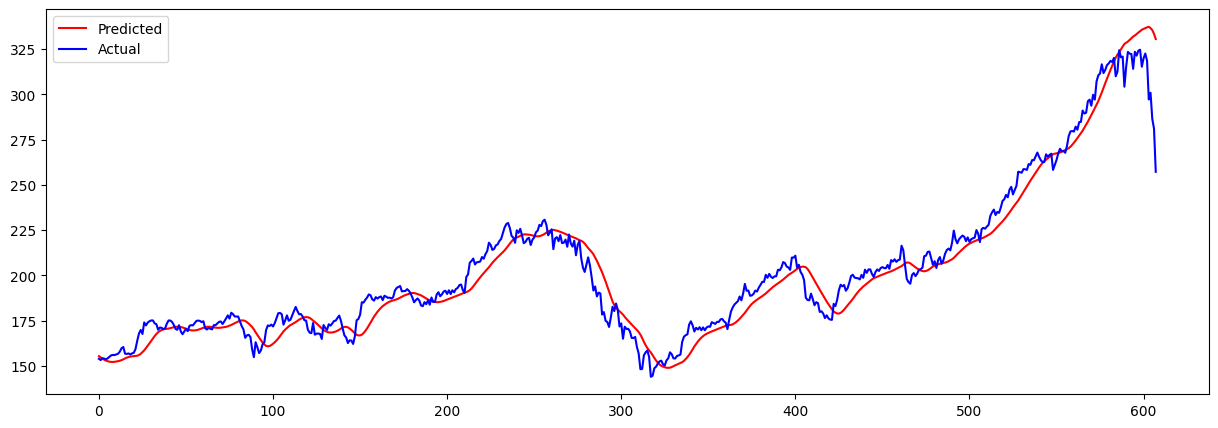

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(yhat, color='red')
plt.plot(testingy, color='blue')
plt.legend(['Predicted', 'Actual'])
plt.xticks=[]
plt.yticks=[]
plt.show()

array([[153.89  ],
       [153.21  ],
       [154.26  ],
       [154.01  ],
       [153.63  ],
       [154.18  ],
       [154.97  ],
       [155.81  ],
       [156.055 ],
       [155.97  ],
       [156.35  ],
       [156.73  ],
       [157.9   ],
       [159.78  ],
       [160.42  ],
       [156.75  ],
       [156.61  ],
       [156.89  ],
       [156.29  ],
       [156.91  ],
       [157.23  ],
       [159.29  ],
       [163.89  ],
       [167.9   ],
       [169.87  ],
       [167.64  ],
       [174.    ],
       [172.365 ],
       [173.91  ],
       [174.66  ],
       [175.11  ],
       [175.11  ],
       [173.5   ],
       [173.04  ],
       [169.97  ],
       [171.18  ],
       [171.04  ],
       [170.29  ],
       [170.78  ],
       [173.36  ],
       [175.1   ],
       [175.05  ],
       [174.3   ],
       [172.63  ],
       [170.43  ],
       [169.95  ],
       [172.48  ],
       [169.06  ],
       [167.5   ],
       [169.03  ],
       [170.49  ],
       [169.2   ],
       [172.

In [ ]:
yhat

array([[0.4265708 ],
       [0.42401665],
       [0.42171988],
       [0.41986975],
       [0.4183797 ],
       [0.4171635 ],
       [0.41628116],
       [0.41578898],
       [0.41571802],
       [0.41598698],
       [0.41647893],
       [0.41716835],
       [0.41802382],
       [0.41912806],
       [0.4206217 ],
       [0.42241478],
       [0.42382616],
       [0.42490864],
       [0.4257415 ],
       [0.42626277],
       [0.4266284 ],
       [0.42690545],
       [0.42740715],
       [0.42868453],
       [0.43095005],
       [0.43406165],
       [0.4374128 ],
       [0.44158542],
       [0.44597262],
       [0.45056248],
       [0.4552167 ],
       [0.4598052 ],
       [0.46418554],
       [0.46805683],
       [0.47136417],
       [0.47370976],
       [0.47546738],
       [0.47669542],
       [0.47738266],
       [0.47773528],
       [0.47820255],
       [0.478957  ],
       [0.47987744],
       [0.48078996],
       [0.48143917],
       [0.48156738],
       [0.48125902],
       [0.481